In [77]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import matplotlib
from skimage import io
import math
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 1 K-means Clustering

## 1.1 Implementing K-means

### 1.1.1 Finding closest centroids

In [78]:
def findClosestCentroids(X,centroids):
    '''This function will go over every example in X,find its closest centroid,and store the
    index inside idx at the appropriate location'''
    #set K=number of centroids
    K=centroids.shape[0]
    #set m=number of examples
    m=X.shape[0]
    #the variables needed to be returned
    idx=np.zeros((m,1))
    #set the array to save the example'distance^2 to all centroids
    dis=np.zeros((K,))
    #compute
    for i in range(m):
        for j in range(K):
            dis[j]=np.linalg.norm(X[i,:]-centroids[j,:],ord=2)**2
        idx[i][0]=np.argmin(dis)+1
    return idx

In [79]:
#================= Part 1: Find Closest Centroids ====================
#Load an example dataset that we will be using
dataFile='ex7data2.mat'
data=scio.loadmat(dataFile)
X=data['X']

#Select an initial set of centroids
K=3
initial_centroids=np.array([[3,3],[6,2],[8,5]])

#Find the closest centroids for the examples using the initial_centroids
idx=findClosestCentroids(X,initial_centroids)
#test wether the function is right
print('Closest centroids for the first 3 examples:')
print(idx[:3,:])
print('(the closest centroids should be 1,3,2 respectively)')

Closest centroids for the first 3 examples:
[[ 1.]
 [ 3.]
 [ 2.]]
(the closest centroids should be 1,3,2 respectively)


### 1.1.2 Computing centroid means

In [80]:
def computeCentroids(X,idx,K):
    '''This function will go over every centroid and compute mean of all points that 
    belong to it'''
    #set useful variables
    m,n=X.shape
    centroids=np.zeros((K,n))
    
    #unroll the idx
    idx=idx.ravel()
    
    #compute the mean
    for i in range(K):
        for j in range(n):
            centroids[i][j]=np.mean(X[idx==i+1][:,j])
    return centroids

In [81]:
#===================== Part 2: Compute Means =========================
#Compute means based on the closest centroids found in the previous part
centroids=computeCentroids(X,idx,K)
#test wether the function is right
print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('the centroids should be:')
print('[2.428301,3.157924]')
print('[5.813503,2.633656]')
print('[7.119387,3.616684]')

Centroids computed after initial finding of closest centroids:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]
the centroids should be:
[2.428301,3.157924]
[5.813503,2.633656]
[7.119387,3.616684]


## 1.2 K-means on example dataset

In [82]:
def plotDataPoints(X,idx,K):
    '''This function plots data points in X,coloring them so that those with the same index
    assignments in idx have the same color'''
    #unroll idx
    idx=idx.ravel()#为了使用后面的X[idx==i+1]这条语句，如果idx是二维数组的话，无法用这条语句
    color=['r','b','y']
    for i in range(K):
        X_plot=X[idx==i+1]
        plt.plot(X_plot[:,0],X_plot[:,1],color[i]+'o')

In [83]:
def drawLine(p1,p2):
    '''This function draws a line from p1 to p2 '''
    plt.plot(np.array([p1[0],p2[0]]),np.array([p1[1],p2[1]]),'k-')

In [84]:
def plotProgresskMeans(X,centroids,previous,idx,K,i):
    '''This function is a helper function that displays the progress of k-Means as it is
    running.It is intended for use only with 2D data'''
    
    #Plot the examples
    plotDataPoints(X,idx,K)
    
    #Plot the centroids as black x's
    plt.plot(centroids[:,0],centroids[:,1],'kx')
    
    #Plot the history of centroids with lines
    for i in range(centroids.shape[0]):
        drawLine(centroids[i],previous[i])
    
    #Title
    plt.title('Iteration number '+str(i))

In [85]:
def runkMeans(X,initial_centroids,max_iters,plot_progress=False):
    '''This function will run the K-Means algorithm on data matrix X,where each row of X is
    a single example'''
    
    #Initialize values
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroids=initial_centroids
    previous_centroids=centroids
    idx=np.zeros((m,1))
    
    #Run K-Means
    for i in range(max_iters):
        idx=findClosestCentroids(X,centroids)
        if plot_progress==True:
            plotProgresskMeans(X,centroids,previous_centroids,idx,K,i+1)
            previous_centroids=centroids
        centroids=computeCentroids(X,idx,K)
    plt.show()
    return centroids,idx

(300, 2)


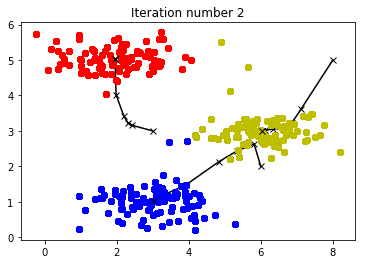

In [86]:
#=================== Part 3: K-Means Clustering ======================
#Load an example dataset
dataFile='ex7data2.mat'
data=scio.loadmat(dataFile)
X=data['X']
print(X.shape)

#Settings for running K-Means
K=3
max_iters=10

#For consistency,here we set centroids to specific values
initial_centroids=np.array([[3,3],[6,2],[8,5]])

#Run K-Means algorithm
centroids,idx=runkMeans(X,initial_centroids,max_iters,True)

## 1.3 Random initialization

## 1.4 Image compression with K-means

introduction of skimage.io:
http://scikit-image.org/docs/stable/api/skimage.io.html

In [87]:
def kMeansInitCentroids(X,K):
    '''This function initials K centroids randomly on the dataset X'''
    centroids=np.zeros((K,X.shape[1]))
    m=X.shape[0]
    rand=np.random.randint(0,m+1,K)
    for i in range(K):
        centroids[i]=X[rand[i]]
    return centroids

(128, 128, 3)

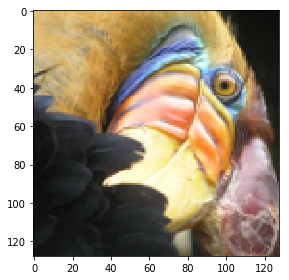

In [88]:
A=io.imread('bird_small.png')/255
io.imshow(A)
A.shape

In [89]:
#============= Part 4: K-Means Clustering on Pixels ===============
# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
img_size=A.shape
X=A.reshape(img_size[0]*img_size[1],3)

#Run K-Means algorithm on this data
#should try different values of K and max_iters here
K=16
max_iters=10

#When using K-Means,it is important the initialize the centroids randomly
initial_centroids=kMeansInitCentroids(X,K)

#Run K-Means
centroids,idx=runkMeans(X,initial_centroids,max_iters)

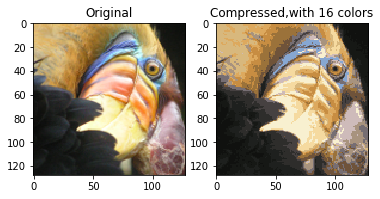

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [90]:
#================= Part 5: Image Compression ======================

#Find closest cluster members
idx=findClosestCentroids(X,centroids)
#We can now recover the image from the indices(idx) by mapping each pixel
X_recovered=np.zeros(X.shape)
for i in range(X_recovered.shape[0]):
    X_recovered[i]=centroids[int(idx[i][0])-1]
X_recovered=X_recovered.reshape((img_size[0],img_size[1],3))

#Display the figure
plt.figure(1)
#Display the original image
plt.subplot(121)
plt.imshow(A)
plt.title('Original')

#Display compressed image side by side
plt.subplot(122)
plt.imshow(X_recovered)
plt.title('Compressed,with {} colors'.format(K))
plt.show()

#save the image
io.imsave('compressed with 16 colors.png',X_recovered)

# 2 Principal Component Analysis

## 2.1 Example Dataset

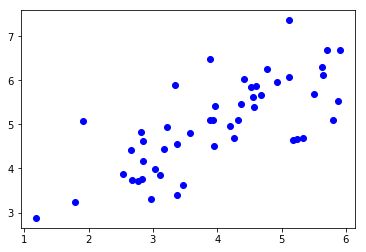

In [91]:
#================== Part 1: Load Example Dataset  ===================
#Load data
dataFile='ex7data1.mat'
data=scio.loadmat(dataFile)
X=data['X']
X.shape
#Visualize the example dataset
plt.plot(X[:,0],X[:,1],'bo')
plt.show()

## 2.2 Implementing PCA
计算协防差矩阵：
$$\Sigma=\frac{1}{m}\sum_{i=1}^{n}(x^{(i)})(x^{(i)})^{T}$$
用矩阵求：
$$\Sigma=\frac{1}{m}X^{T}X$$

In [92]:
#=============== Part 2: Principal Component Analysis ===============
def featureNormalize(X):
    '''This function normalize features in X'''
    mu=np.mean(X,axis=0)
    X_norm=X-mu
    sigma=np.std(X_norm,ddof=1,axis=0)
    X_norm=X_norm/sigma
    return X_norm,mu,sigma
def pca(X):
    '''This function runs pricipal component analysis on the dataset X'''
    m,n=X.shape
    
    #compute the covariance matrix(协防差矩阵)
    Sigma=(1/m)*np.dot(X.T,X)
    U,S,V=np.linalg.svd(Sigma)
    return U,S

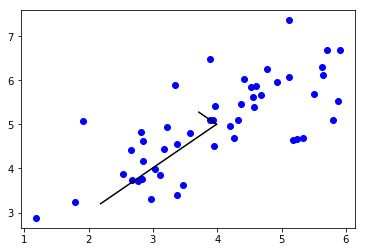

Top eigenvector:
U[:,0]= -0.707106781187 -0.707106781187
(you should expect to see -0.707107  -0.707107)


In [93]:
#normalize X
X_norm,mu,sigma=featureNormalize(X)

#run PCA
U,S=pca(X_norm)
#Draw the eigenvectors centered at mean of data.These lines show the directions of maximum
#variations in the dataset
plt.plot(X[:,0],X[:,1],'bo')
drawLine(mu,mu+1.5*S[0]*U[:,0])
drawLine(mu,mu+1.5*S[1]*U[:,1])
plt.show()

#check U
print('Top eigenvector:')
print('U[:,0]=',U[0,0],U[1,0])
print('(you should expect to see -0.707107  -0.707107)')

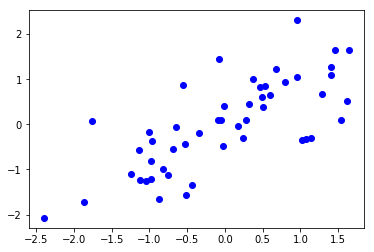

In [94]:
#=================== Part 3: Dimension Reduction ===================
#Plot the normalized dataset
plt.plot(X_norm[:,0],X_norm[:,1],'bo')
plt.show()

In [95]:
#Project the data onto K=1 dimension
def projectData(X,U,K):
    '''This function computes the reduced data representation when projecting only on to the
    top k eigenvectors and returns the projected examples in Z'''
    Z=np.dot(X,U[:,:K])
    return Z

def recoverData(Z,U,K):
    '''This function recovers an approximation of the original data when using the projected
    data'''
    X_rec=np.dot(Z,U[:,:K].T)
    return X_rec

In [96]:
#Test projectData function
K=1
Z=projectData(X_norm,U,K)
print('Projection of the first example:',Z[0])
print('(This value should be about 1.481274)')

#Test recoverData function
X_rec=recoverData(Z,U,K)
print('Approximation of the first example:',X_rec[0])
print('(This value should be about -1.047419,-1.047419)')

Projection of the first example: [ 1.48127391]
(This value should be about 1.481274)
Approximation of the first example: [-1.04741883 -1.04741883]
(This value should be about -1.047419,-1.047419)


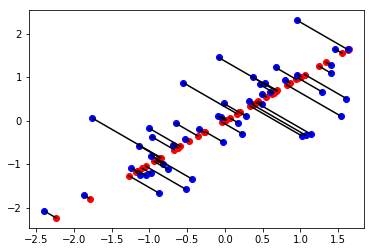

In [97]:
#Draw lines connceting the projected points to the original points
plt.plot(X_rec[:,0],X_rec[:,1],'ro')
plt.plot(X_norm[:,0],X_norm[:,1],'bo')
for i in range(X_norm.shape[0]):
    drawLine(X_norm[i],X_rec[i])
plt.show()

## 2.4 Face Image Dataset

### 2.4.1 PCA on Faces

In [98]:
def displayData(X):
    '''Display the image'''
    #由于数据保存原因，首先将每个图片的矩阵做转置处理
    m,n=X.shape
    width=height=int(math.sqrt(n))
    X=np.array([im.reshape(width,height).T for im in X])
    X=np.array([im.reshape(n) for im in X])
    row_num=col_num=int(math.sqrt(m))
    fig,ax=plt.subplots(nrows=row_num,sharex=True,sharey=True,ncols=col_num,figsize=(8,8))
    for i in range(row_num):
        for j in range(col_num):
            ax[i][j].imshow(X[i*row_num+j].reshape(width,height),cmap=matplotlib.cm.gray)

(5000, 1024)


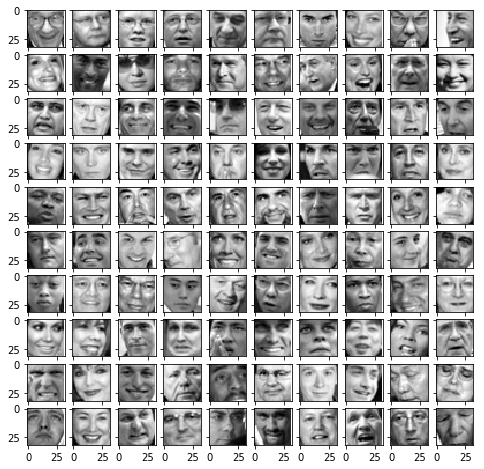

In [99]:
#=============== Part 4: Loading and Visualizing Face Data =============
#Load Face dataset
dataFile='ex7faces.mat'
data=scio.loadmat(dataFile)
X=data['X']
print(X.shape)

#Display the first 100 faces in the dataset
displayData(X[:100,:])
plt.show()

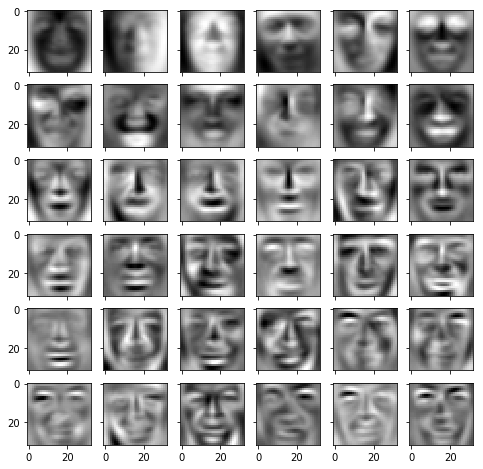

In [100]:
#=========== Part 5: PCA on Face Data: Eigenfaces  ===================
#  Run PCA and visualize the eigenvectors which are in this case eigenfaces
#  We display the first 36 eigenfaces.

#normalize features
X_norm,mu,sigma=featureNormalize(X)

#Run PCA
U,S=pca(X_norm)

#Visualize the top 36 eigenvectors found
displayData(U[:,:36].T)
plt.show()

### 2.4.2 Dimensionality Reduction

In [101]:
#============= Part 6: Dimension Reduction for Faces =================
#compress dimension from 1024 to 100
K=100
Z=projectData(X_norm,U,K)
print('The projected data Z has a size of:')
print(Z.shape)

The projected data Z has a size of:
(5000, 100)


Original faces:


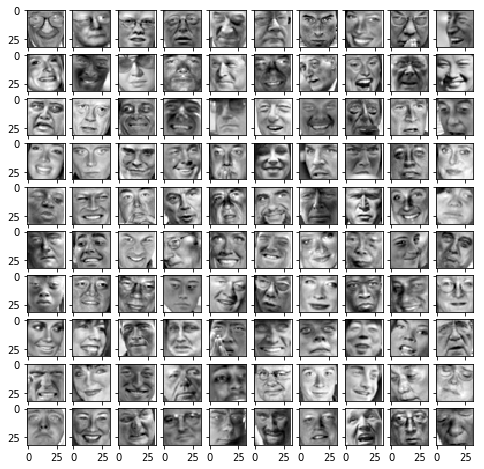

Recovered faces:


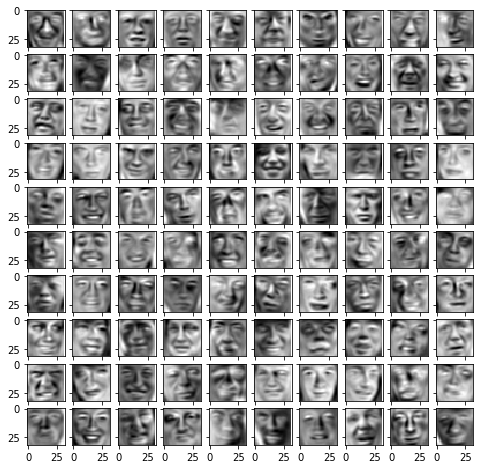

In [102]:
#==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
#recover dimension from 100 to 1024
K=100
X_rec=recoverData(Z,U,K)

#Display normalized data
print('Original faces:')
displayData(X_norm[:100,:])
plt.show()
#Display reconstructed data from only k eigenfaces
print('Recovered faces:')
displayData(X_rec[:100,:])
plt.show()

## 2.5 Optional (ungraded) exercise: PCA for visualization

In [103]:
#=== Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
#  One useful application of PCA is to use it to visualize high-dimensional
#  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
#  pixel colors of an image. We first visualize this output in 3D, and then
#  apply PCA to obtain a visualization in 2D.

#Reload the image from the previous exercis and run K-means on it
A=io.imread('bird_small.png')/255
img_size=A.shape
X=A.reshape(img_size[0]*img_size[1],3)
K=16
max_iters=10
initial_centroids=kMeansInitCentroids(X,K)
centroids,idx=runkMeans(X,initial_centroids,max_iters)

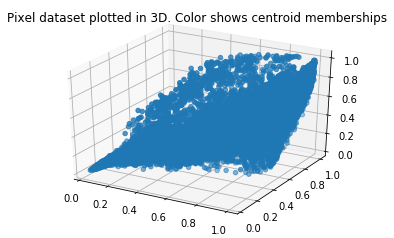

In [104]:
fig=plt.figure().add_subplot(111,projection='3d')
fig.scatter(X[:,0],X[:,1],X[:,2])
plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships')
plt.show()

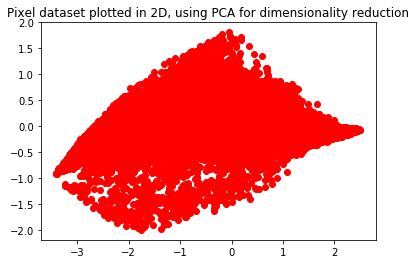

In [105]:
#=== Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
X_norm,mu,sigma=featureNormalize(X)
U,S=pca(X_norm)
Z=projectData(X_norm,U,2)

#plot in 2D
plt.plot(Z[:,0],Z[:,1],'ro')
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction')
plt.show()

/home/zhanghaoxu/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


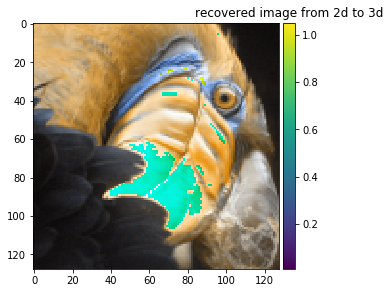

In [106]:
#显示由3d压缩至2d再还原后的图片
X_rec=recoverData(Z,U,2)
X_rec=X_rec.reshape(img_size[0],img_size[1],3)
X_rec=X_rec*sigma+mu #不要忘了把特征缩放后的矩阵还原缩放过程
io.imshow(X_rec)
plt.title('recovered image from 2d to 3d')